In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix, log_loss, roc_auc_score, roc_curve
import seaborn as sn
import pandas as pd
from sklearn import preprocessing
from sklearn import utils
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('loan.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2497 non-null float64
FICO.Score        2499 non-null float64
Loan.Length       2500 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(3), int64(2)
memory usage: 117.2 KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2497.0,13.067521,4.180074,5.42,10.16,13.11,15.8,24.89
FICO.Score,2499.0,705.870348,35.029051,640.00,680.00,700.00,725.0,830.00
Loan.Length,2500.0,41.260800,9.930893,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2500.0,12406.500000,7801.544872,1000.00,6000.00,10000.00,17000.0,35000.00


In [42]:
null_columns = df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns])

      Interest.Rate  FICO.Score  Monthly.Income
2310            NaN       670.0         4500.00
2327          20.49       660.0             NaN
254           10.16       705.0             NaN
513             NaN       690.0             NaN
581             NaN       690.0         3916.67
298            6.62       775.0             NaN
367            7.43       800.0             NaN
409            6.62         NaN         5833.33


In [43]:
# Decided to remove the whole record of NaN in Monthly.Income column (5 records), 
df = df.drop([2327, 254, 513, 298, 367])

In [44]:
# Decided to replace Interest.Rate and Fico.score NaN values with mean value
print(df[df.isnull().any(axis=1)][null_columns])

      Interest.Rate  FICO.Score  Monthly.Income
2310            NaN       670.0         4500.00
581             NaN       690.0         3916.67
409            6.62         NaN         5833.33


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2493.0,13.070558,4.176856,5.42,10.16,13.11,15.8,24.89
FICO.Score,2494.0,705.829992,34.972523,640.00,680.00,700.00,725.0,830.00
Loan.Length,2495.0,41.271343,9.938046,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2495.0,12413.897796,7805.847038,1000.00,6000.00,10000.00,17000.0,35000.00


In [46]:
df['Interest.Rate'] = df['Interest.Rate'].fillna(df['Interest.Rate'].mean())
df['FICO.Score'] = df['FICO.Score'].fillna(df['FICO.Score'].mean())

In [47]:
df.loc[[2310, 581, 409]]

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
2310,13.070558,670.000000,36,4500.00,4800
581,13.070558,690.000000,36,3916.67,12500
409,6.620000,705.829992,36,5833.33,5600


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2495.0,13.070558,4.175181,5.42,10.16,13.11,15.8,24.89
FICO.Score,2495.0,705.829992,34.965511,640.00,680.00,700.00,725.0,830.00
Loan.Length,2495.0,41.271343,9.938046,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2495.0,12413.897796,7805.847038,1000.00,6000.00,10000.00,17000.0,35000.00


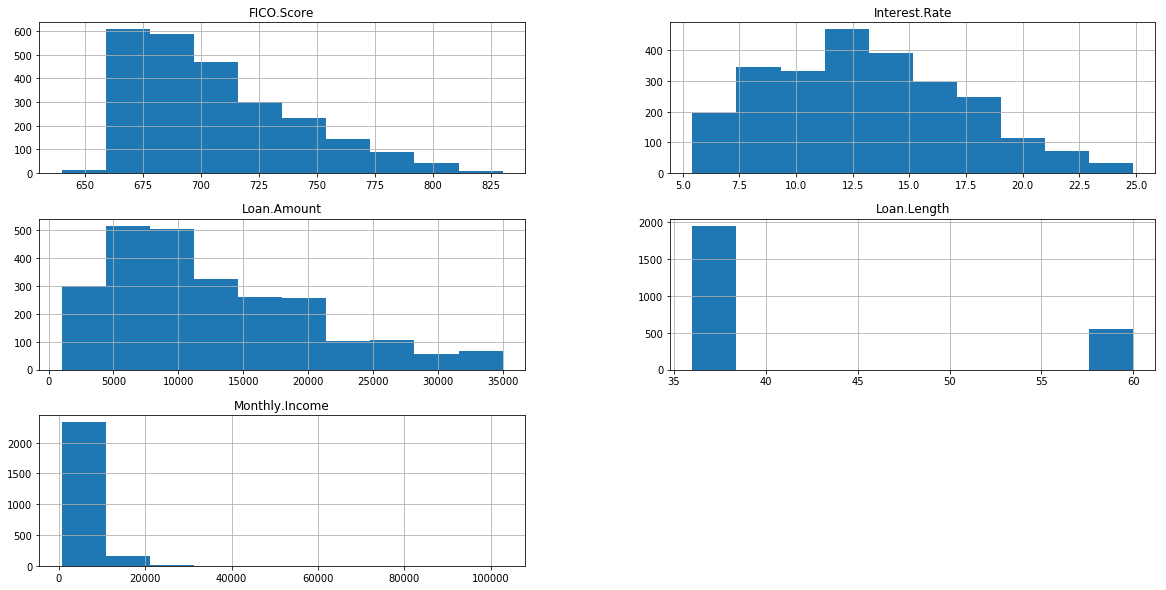

In [49]:
df.hist(figsize=(20,10));

In [50]:
df[df['Monthly.Income'] > 35000]

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
1999,16.29,705.0,36,39583.33,35000
268,6.91,725.0,36,65000.00,4500
1852,7.62,805.0,36,102750.00,33000


In [51]:
df = df.drop([268, 1852])

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2493.0,13.075215,4.173602,5.42,10.16,13.11,15.8,24.89
FICO.Score,2493.0,705.782523,34.920939,640.00,680.00,700.00,725.0,830.00
Loan.Length,2493.0,41.275572,9.940911,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2493.0,5627.536181,3245.867259,588.50,3500.00,5000.00,6750.0,39583.33
Loan.Amount,2493.0,12408.814681,7796.469204,1000.00,6000.00,10000.00,17000.0,35000.00


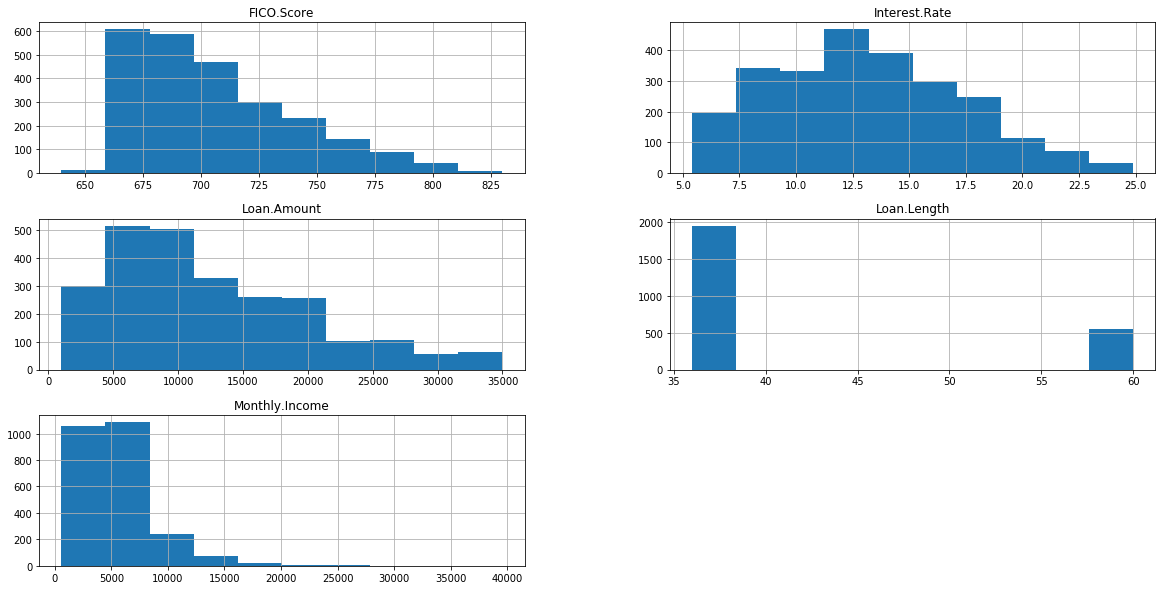

In [53]:
df.hist(figsize=(20,10));

In [54]:
df['9% or Lower'] = np.where(df['Interest.Rate'] <= 9.0, 1, 0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2493 entries, 6 to 2497
Data columns (total 6 columns):
Interest.Rate     2493 non-null float64
FICO.Score        2493 non-null float64
Loan.Length       2493 non-null int64
Monthly.Income    2493 non-null float64
Loan.Amount       2493 non-null int64
9% or Lower       2493 non-null int32
dtypes: float64(3), int32(1), int64(2)
memory usage: 126.6 KB


In [55]:
y = df['9% or Lower'].values
X = df[['FICO.Score', 'Monthly.Income', 'Loan.Amount']].values
X.shape, y.shape

((2493, 3), (2493,))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [58]:
params = {
          'penalty': ['l2'], 
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'fit_intercept': [True, False],
          'C': np.logspace(-3,3)
         }
gs = GridSearchCV(LogisticRegression(), param_grid=params, scoring='neg_log_loss', cv=10, n_jobs=5).fit(X_train, y_train)
gs

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'fit_intercept': [True, False], 'C': array([1.00000e-03, 1.32571e-03, 1.75751e-03, 2.32995e-03, 3.08884e-03,
       4.09492e-03, 5.42868e-03, 7.19686e-03, 9.54095e-03, 1.26486e-02,
       1.67683e-02, 2.2230... 1.84207e+02, 2.44205e+02,
       3.23746e+02, 4.29193e+02, 5.68987e+02, 7.54312e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [59]:
gs.best_estimator_

LogisticRegression(C=0.868511373751352, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [60]:
gs.best_params_

{'C': 0.868511373751352,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'sag'}

In [61]:
model = LogisticRegression(**gs.best_params_).fit(X_train, y_train)

In [62]:
y_hat = model.predict(X_test)
p_hat = model.predict_proba(X_test)[:,1]

In [63]:
log_loss(y_test, p_hat)

0.27122598335234516

In [64]:
baseline = 1 - (y_test.sum() / y_test.size)
accuracy = accuracy_score(y_test, y_hat)
baseline, accuracy

(0.7767379679144385, 0.8649732620320856)

In [65]:
# TP / (TP + FP) # type 1 errors
precision_score(y_test, y_hat)

0.775

In [66]:
# TP / (TP + FN) # type 2 errors --- focus on increasing this number
recall_score(y_test, y_hat)

0.5568862275449101

In [67]:
auc = roc_auc_score(y_test, p_hat)
auc

0.9429591763117482

In [68]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
for th, fp, tp in zip(thr, fpr, tpr):
    print("{0:.2f} {1:.2f} {2:.2f}".format(th, fp, tp))

2.00 0.00 0.00
1.00 0.00 0.01
1.00 0.00 0.01
0.99 0.00 0.01
0.92 0.00 0.20
0.91 0.00 0.20
0.91 0.00 0.21
0.90 0.01 0.21
0.90 0.01 0.23
0.89 0.01 0.23
0.89 0.01 0.24
0.89 0.01 0.24
0.86 0.01 0.28
0.85 0.01 0.28
0.84 0.01 0.31
0.84 0.01 0.31
0.84 0.01 0.32
0.83 0.02 0.32
0.82 0.02 0.33
0.80 0.02 0.33
0.77 0.02 0.36
0.76 0.02 0.36
0.76 0.02 0.37
0.75 0.02 0.37
0.75 0.02 0.38
0.74 0.03 0.38
0.72 0.03 0.40
0.72 0.03 0.40
0.68 0.03 0.43
0.67 0.03 0.43
0.66 0.03 0.44
0.66 0.03 0.44
0.65 0.03 0.44
0.65 0.03 0.44
0.63 0.03 0.46
0.62 0.04 0.46
0.61 0.04 0.47
0.61 0.04 0.47
0.60 0.04 0.48
0.58 0.04 0.48
0.57 0.04 0.50
0.56 0.04 0.50
0.56 0.04 0.50
0.56 0.04 0.50
0.55 0.04 0.51
0.55 0.04 0.51
0.52 0.04 0.56
0.50 0.05 0.56
0.50 0.05 0.56
0.50 0.05 0.56
0.48 0.05 0.60
0.48 0.05 0.60
0.47 0.05 0.62
0.47 0.05 0.62
0.46 0.05 0.64
0.46 0.06 0.64
0.45 0.06 0.65
0.45 0.06 0.65
0.43 0.06 0.68
0.43 0.06 0.68
0.42 0.06 0.69
0.42 0.06 0.69
0.41 0.06 0.70
0.40 0.06 0.70
0.39 0.06 0.72
0.39 0.07 0.72
0.39 0.07 

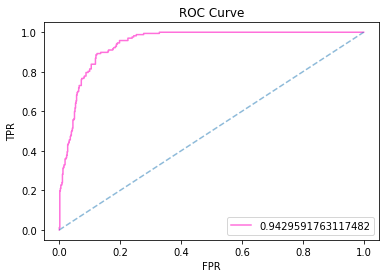

In [69]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()